In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gwinc.transfer_matrices import Squeezer, FilterCavity, Readout
from gwinc.transfer_matrices import build_transfer_matrix
from gwinc.noise import build_noise

In [3]:
transfer_matrix = build_transfer_matrix([
    Squeezer(
        squeezing_factor = 10,
        squeezing_angle = 0,
        squared_injection_loss = 0.32
    ),
    FilterCavity(
        squared_input_mirror_transmission = 0.00136,
        squared_round_trip_loss = 120e-6,
        filter_cavity_length = 300,
        carrier_wavelength = 1064,
        detuning = 0.1,
        filter_cavity_length_error = 0,
        sum_of_all_squeezed_filter_cavity_higher_order_mode_coupling_coefficients = 0.06,
        sum_of_all_squeezed_local_oscillator_higher_order_mode_coupling_coefficients = 0.02,
        mode_mismatch_phase_ambiguity = 2*np.pi
    ),
    Readout(
        squared_readout_loss = 0.06
    )
])

In [4]:
noise = build_noise(
    transfer_matrix = transfer_matrix, 
    measurement_amplitude = 1, 
    measurement_phase = 0.1 * np.pi/180
)

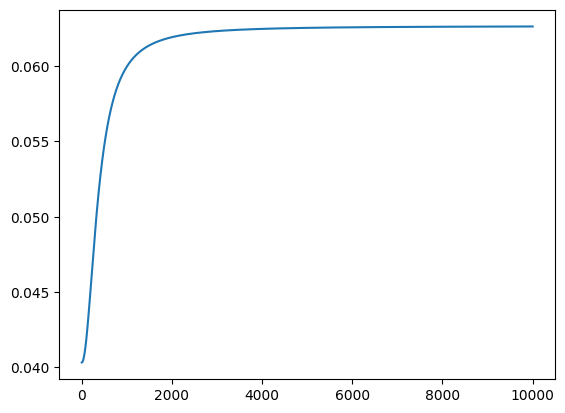

In [5]:
omegas = np.linspace(0, 10000, 1000)
plt.plot(omegas, [noise(omega) for omega in omegas])